# Classify Fashion Icons with Keras
[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Sept 20, 2021

1. Train a deep learning model with only Dense layers with the same number of neurons in each layer. Tune the number of neurons and other hyperparameters to reach at least 87% test accuracy (30 pts).
2. Double the number of layers used in #1 and retrain the model without changing anything else and explain the accuracy you observe. Is the new model better? If yes, why? If not, why not? (20 pts).
3. Double the number of neurons in each layer used in #1 and retrain the model without changing anything else and explain the accuracy you observe. Is the new model better? If yes, why? If not, why not? (20 pts)
4. What else can you do to improve the accuracy of your model? (30 pts)
Please propose up to 3 strategies. 10 pts will be given for each proved strategy. You just need to apply your strategy and retrain the model to prove your strategy.

# Homework 2 Questions
1. The following model parameters gave a model accuracy of 87.02% with 10 epochs.
<br>
<br>
model = Sequential() <br>
model.add(Flatten()) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(10, activation='softmax')) <br> <br>


2. The addition of a second hidden layer changed the accuracy to the 87.43% with 10 epochs. This model runs slightly more accurately and with similar val accuracy, therefore I would choose the simpler model used in question 1.
<br>
<br>
model = Sequential() <br>
model.add(Flatten()) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(10, activation='softmax')) <br> <br>

3. Using the model parameters below gave an accuracy of 87.49% with 10 epochs. This model is slightly more accurate than the model in question 1 with the same ammount of complexity. Therefore I would consider this an improvement.
<br>
<br>
model = Sequential() <br>
model.add(Flatten()) <br>
model.add(Dense(80, activation='relu')) <br>
model.add(Dense(10, activation='softmax')) <br> <br>

4. What else can you do to improve the accuracy of your model? (30 pts)
Please propose up to 3 strategies. 10 pts will be given for each proved strategy. You just need to apply your strategy and retrain the model to prove your strategy.
<br>
<br>
I) Add more hidden layers of same density
<br>
<br>
model = Sequential() <br>
model.add(Flatten()) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(10, activation='softmax')) <br> <br>
A 3rd layer with a dense value of 40 was added the the model used in question 1. This method yielded an accuracy of 87.32%. Since this is more complex than the model used in question 2 and became more inaccurate, this methodology may not be suitible for the problem solved.<br><br>
II) Run more epochs
<br>
<br>
model = Sequential() <br>
model.add(Flatten()) <br>
model.add(Dense(40, activation='relu')) <br>
model.add(Dense(10, activation='softmax')) <br> <br>
<br>Running the model used in question one with 20 epochs yielded an accuracy of 87.62%. I would consider this an accuracy improvement but this method takes longer to train and could give diminishing returns by overtraining.<br><br>
III)Further increase density of already existing hidden layers
<br>
<br>
model = Sequential() <br>
model.add(Flatten()) <br>
model.add(Dense(128, activation='relu')) <br>
model.add(Dense(10, activation='softmax')) <br> <br>
Increasing the density of the single hidden layer to 128, as seen in the example given, yields an accuracy of 88.33%. This was by more the most effective method of increasing accuracy without negatively affecting the model runtime.

In [183]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [184]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

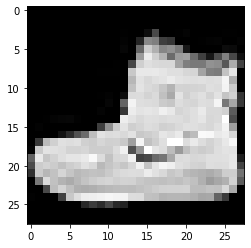

In [185]:
# show the first image in the data set
plt.imshow(X_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

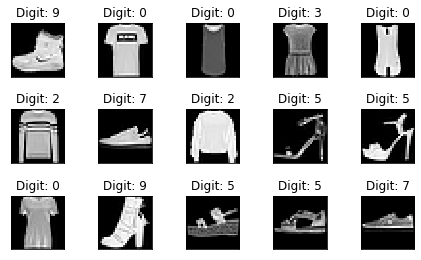

In [186]:
# show the first 15 images in the data set.
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [187]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

In [188]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(40, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))


In [189]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [190]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [175]:
model.fit(x=X_train, y=y_train, epochs=20, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1875/1875 [==============================] - 1s 601us/step - loss: 0.5568 - accuracy: 0.8035 - val_loss: 0.4701 - val_accuracy: 0.8335
Epoch 2/20
1875/1875 [==============================] - 1s 402us/step - loss: 0.4035 - accuracy: 0.8537 - val_loss: 0.4275 - val_accuracy: 0.8488
Epoch 3/20
1875/1875 [==============================] - 1s 415us/step - loss: 0.3685 - accuracy: 0.8668 - val_loss: 0.3927 - val_accuracy: 0.8590
Epoch 4/20
1875/1875 [==============================] - 1s 395us/step - loss: 0.3462 - accuracy: 0.8740 - val_loss: 0.3795 - val_accuracy: 0.8645
Epoch 5/20
1875/1875 [==============================] - 1s 384us/step - loss: 0.3289 - accuracy: 0.8796 - val_loss: 0.3870 - val_accuracy: 0.8629
Epoch 6/20
1875/1875 [==============================] - 1s 368us/step - loss: 0.3183 - accuracy: 0.8837 - val_loss: 0.3688 - val_accuracy: 0.8706
Epoch 7/20
1875/1875 [==============================] - 1s 366us/step - loss: 0.3075 - accuracy: 0.8865 - val_loss: 0.3702 -

In [176]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                410       
Total params: 31,810
Trainable params: 31,810
Non-trainable params: 0
_________________________________________________________________


In [177]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8718000054359436


In [178]:
# Save model into MNIST.h5 and we are all done with the training now.
model.save('MNIST.h5')

In [179]:
model = models.load_model('MNIST.h5')

In [180]:
predictions = model.predict(X_test)

In [181]:
# function that plots a single image.
def test_digit(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

In [182]:
# let's output the images which were not predicted correctly.
#for i in range(len(X_test)):
    #if np.argmax(predictions[i]) != y_test[i]:
        #test_digit(i)